<a href="https://colab.research.google.com/github/suhasparashar/MNIST-Playground/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt
from keras.callbacks import TensorBoard
from time import time
import numpy as np

batch_size = 128
num_classes = 10
epochs = 10

Using TensorFlow backend.


# **Running TensorBoard **

In [2]:
LOG_DIR = '/tmp/log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
! curl http://localhost:6006;
! npm install -g localtunnel ;
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &');


/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/client
+ localtunnel@1.9.1
updated 1 package in 2.148s


In [15]:
! ls /tmp/log
! rm -rf /tmp/log/*

"Author's Network"
'<class '\''keras.optimizers.Adam'\''>-optimizer_val-relu-activation_val-(3, 3)-window_size-1542690873.7802417'
'<class '\''keras.optimizers.Adam'\''>-optimizer_val-relu-activation_val-(3, 3)-window_size-1542690946.4023983'
'<class '\''keras.optimizers.Adam'\''>-optimizer_val-relu-activation_val-(3, 3)-window_size-1542691088.6701195'
'<class '\''keras.optimizers.Adam'\''>-optimizer_val-relu-activation_val-(4, 4)-window_size-1542690917.6086235'
'<class '\''keras.optimizers.Adam'\''>-optimizer_val-relu-activation_val-(4, 4)-window_size-1542690990.218026'
'<class '\''keras.optimizers.Adam'\''>-optimizer_val-relu-activation_val-(5, 5)-window_size-1542691034.6746063'
'<class '\''keras.optimizers.Adam'\''>-optimizer_val-relu-activation_val-(6, 6)-window_size-1542691078.5117648'


In [4]:
# Get url
! cat url.txt

your url is: https://purple-stingray-88.localtunnel.me
your url is: https://massive-swan-60.localtunnel.me
your url is: https://quick-parrot-4.localtunnel.me
your url is: https://angry-wasp-2.localtunnel.me
your url is: https://polite-falcon-65.localtunnel.me
your url is: https://nervous-falcon-42.localtunnel.me


# **Author's Network**

(60000, 28, 28)
(60000, 28, 28, 1)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Author's Network
Test loss: 0.03097366422839441
Test accuracy: 0.9922


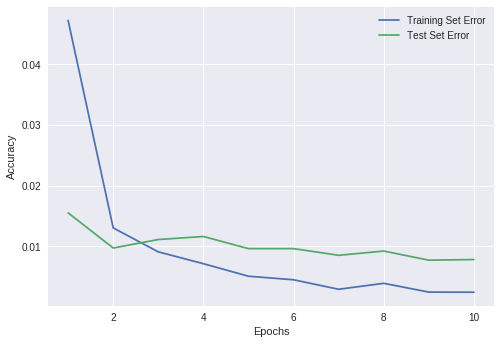

In [17]:

# input image dimensions
img_x, img_y = 28, 28 #Grey scale image

# load the MNIST data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load test and train data from mnist datastore
print(x_train.shape)
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)#Preparing for the keras tensors so that we can reuse it in case we have three channels
print(x_train.shape)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 #Normalize the data to get it between 0 and 1
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
NAME = "Author's Network"
print(NAME)

tensorboard = TensorBoard(log_dir="/tmp/log/{}".format(NAME))

class AccuracyHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
      self.acc = []
      self.val_acc =[]
      self.train_err=[]
      self.test_err=[]
  def on_epoch_end(self, batch, logs={}):
      self.train_err.append(1-logs.get('acc'))
      self.test_err.append(1-logs.get('val_acc'))
      self.acc.append(logs.get('acc'))
      self.val_acc.append(logs.get('val_acc'))

auth_history = AccuracyHistory()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test),
          callbacks=[auth_history,tensorboard]) #tensorboard
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), auth_history.train_err,label="Training Set Error")
plt.plot(range(1, 11), auth_history.test_err,label="Test Set Error")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Images at the end of layers in author's network**
For this I have leveraged the layer outputs to regenerate the tensors at each activation layer

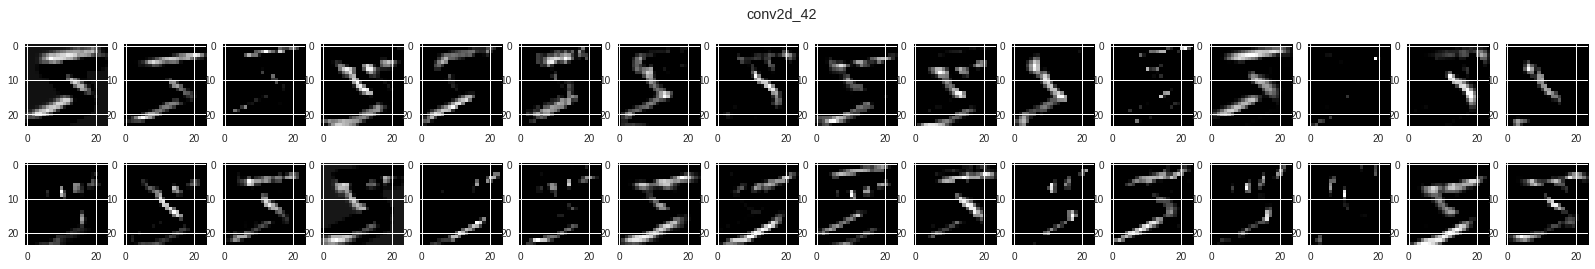

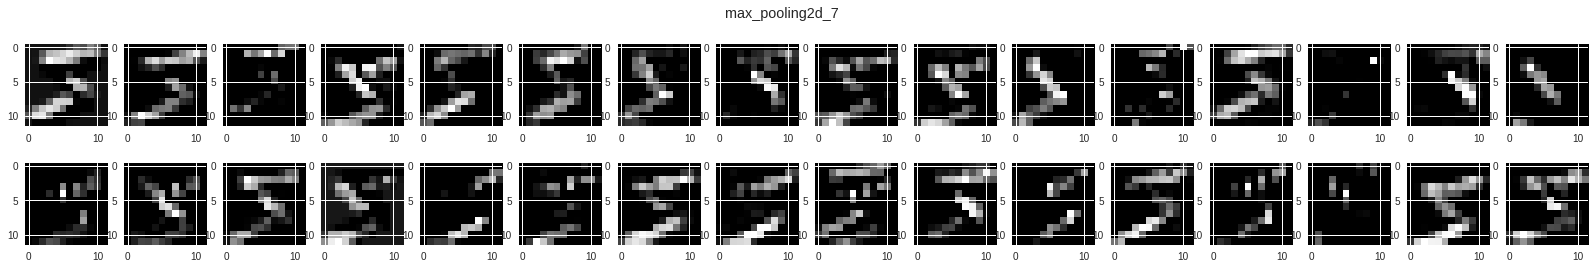

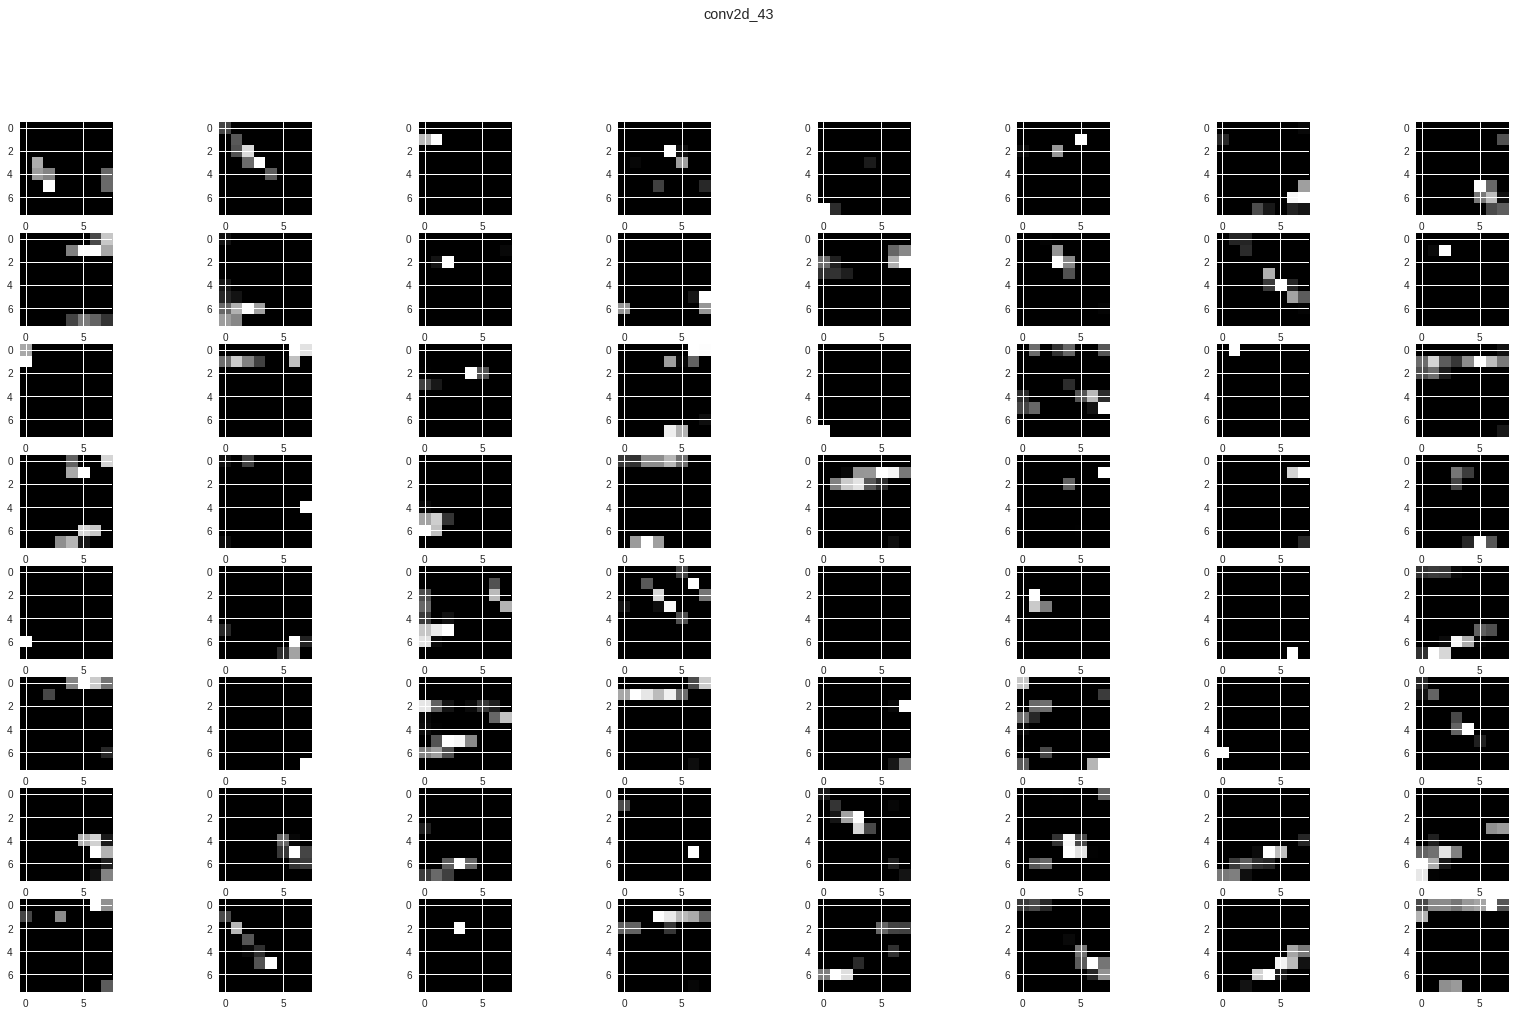

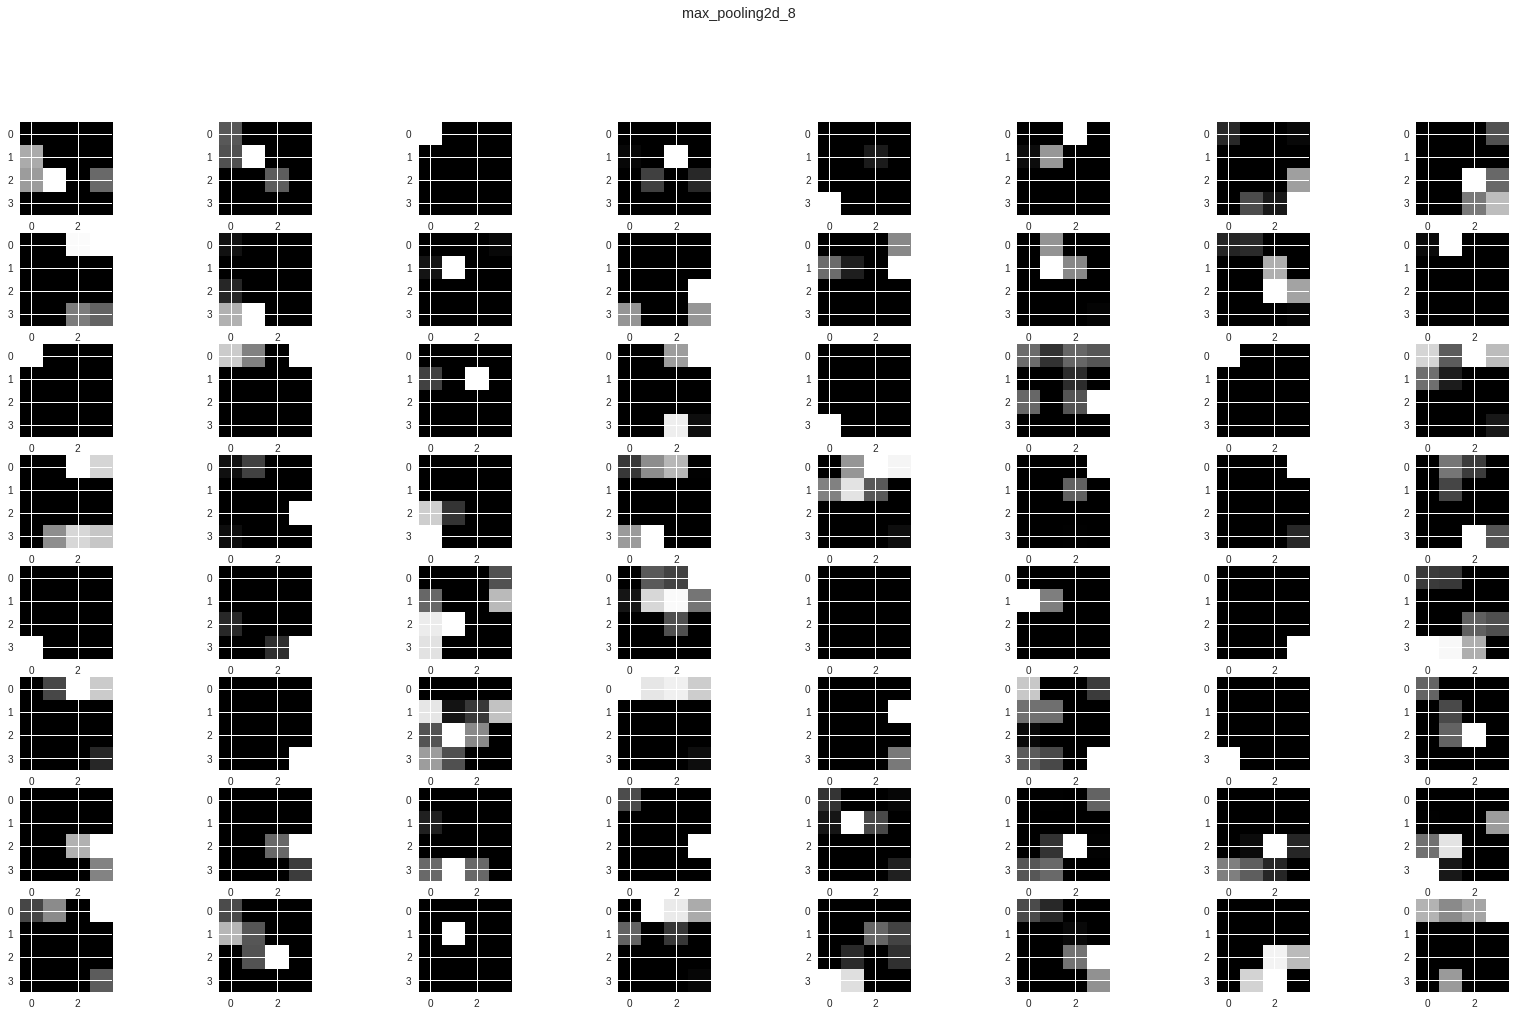

In [18]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
layer_names=[]
for layer in model.layers:
     layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[0].reshape(1,28,28,1))
 
def display_activation(activations,layer_names,act_index): 
    i =-1;
    for activation in activations:
      if i>=act_index :
        break;
      i=i+1;
      activation_index=0
      row_size  =2*(((i//2)*3)+1);
      col_size = activation.shape[3]//(2*(((i//2)*3)+1));
      fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*14//(((i//2)*3)+1),(activation.shape[3]*( ( ( (i//2) * 1 ) +1 ) ))//( 8 )))
     
      for row in range(0,row_size):
          for col in range(0,col_size):
            fig.suptitle(layer_names[i])
            if activation_index < activation.shape[3]:
              ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
display_activation(activations,layer_names,3)

# **Creating a 50-50 Split**
Inorder to get the 50 50 split, I am transferring the 25K records from the training set to the test set. Before I do that, I am getting the count of records for each of the categories(0,1 .. 9) and then trying to create a split such that equal number of records end up in training and test set for each of the categories.

In [9]:


# input image dimensions
img_x, img_y = 28, 28 #Grey scale image

# load the MNIST data set, which already splits into train and test sets for us
(X_train, Y_train), (x_test, y_test) = mnist.load_data() #load test and train data from mnist datastore
ys = [Y_train, y_test]
i = 0;
l = []
for y in ys:
  unique, counts = np.unique(y, return_counts=True);
  l.append(list(zip(unique,counts)))

d = np.add((np.add(l[0],l[1])//2),list(zip((np.zeros(len(l[1]))).astype(int),(-1)*np.asarray(l[1])[:,1])))

ctr = list(zip(np.arange(10), (np.zeros(10)).astype(int)))
ctr =np.array(ctr)
x_train = [];
y_train = [];
for i in range(len(X_train)):
  if d[Y_train[i],1] < ctr[Y_train[i],1]:
    x_train.append(X_train[i]);
    y_train.append(Y_train[i]);
  else:
    x_test=np.append(x_test,[X_train[i]],axis=0)
    y_test=np.append(y_test,[Y_train[i]],axis=0)
  ctr[Y_train[i],1]= ctr[Y_train[i],1] + 1
x_train=np.array(x_train)
y_train=np.array(y_train)

x_train = np.concatenate((x_train,x_test[0:7]),axis = 0)
y_train = np.concatenate((y_train,y_test[0:7]),axis = 0)
x_test = x_test[7:]
y_test = y_test[7:]

print(x_train.shape)
print(y_train.shape)




(35000, 28, 28)
(35000,)


In [10]:


# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)#Preparing for the keras tensors so that we can reuse it in case we have three channels
print(x_train.shape)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 #Normalize the data to get it between 0 and 1
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(35000, 28, 28, 1)
x_train shape: (35000, 28, 28, 1)
35000 train samples
35000 test samples


# **Running with permutations of configurations**

In [0]:

window_sizes = list(zip(np.arange(3,10),np.arange(3,10)))
activation_vals = ['relu','sigmoid']
optimizer_vals = [keras.optimizers.Adam(),keras.optimizers.sgd()]


<class 'keras.optimizers.Adam'>-optimizer_val-relu-activation_val-(3, 3)-window_size-1542691116.5502577
Test loss: 0.08713644320954424
Test accuracy: 0.9789142857142857


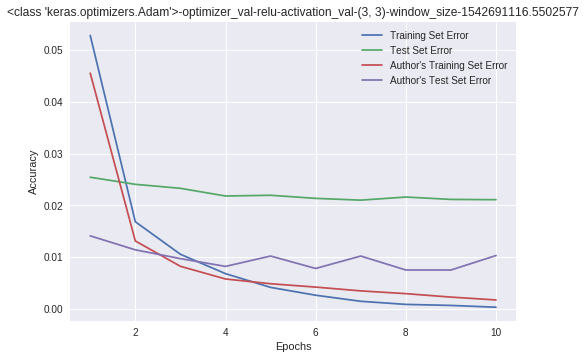

<class 'keras.optimizers.Adam'>-optimizer_val-relu-activation_val-(4, 4)-window_size-1542691158.2852216
Test loss: 0.07655184441516524
Test accuracy: 0.9822571428571428


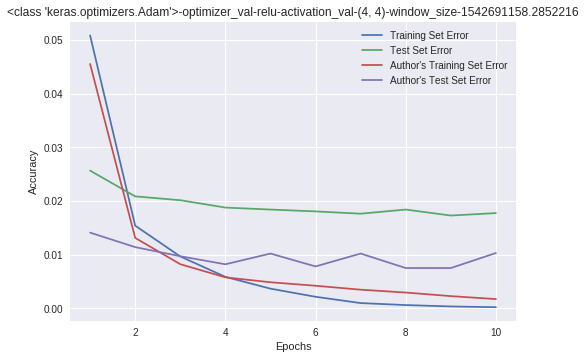

<class 'keras.optimizers.Adam'>-optimizer_val-relu-activation_val-(5, 5)-window_size-1542691199.0853987
Test loss: 0.07089634672092358
Test accuracy: 0.9838


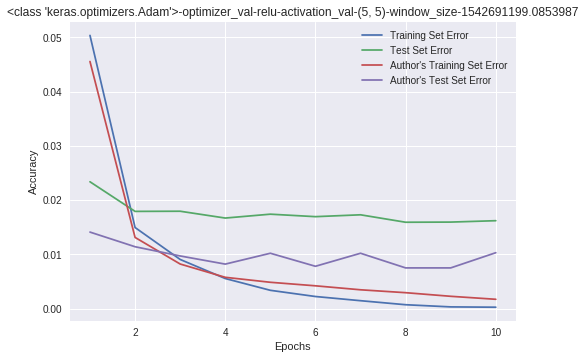

<class 'keras.optimizers.Adam'>-optimizer_val-relu-activation_val-(6, 6)-window_size-1542691238.8191926
Test loss: 0.06505944643011449
Test accuracy: 0.9853142857142857


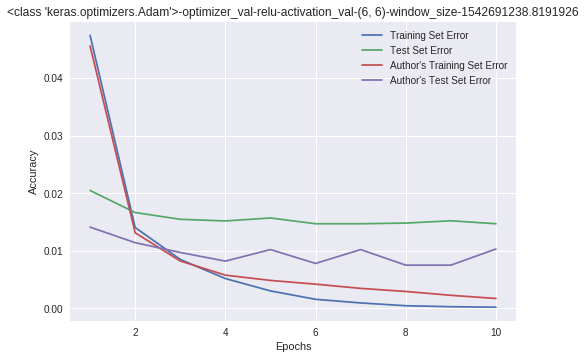

<class 'keras.optimizers.Adam'>-optimizer_val-relu-activation_val-(7, 7)-window_size-1542691281.0105295
Test loss: 0.05960758087298532
Test accuracy: 0.9867142857142858


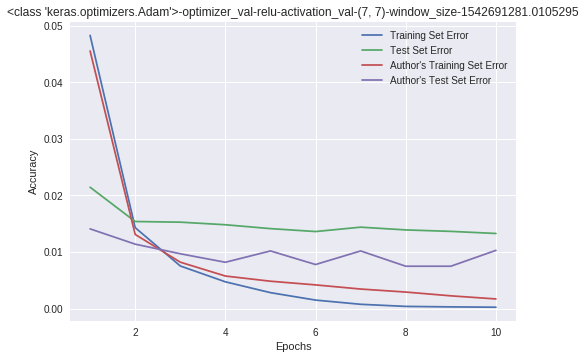

<class 'keras.optimizers.Adam'>-optimizer_val-relu-activation_val-(8, 8)-window_size-1542691321.2754507
Test loss: 0.058276494193069
Test accuracy: 0.9863714285714286


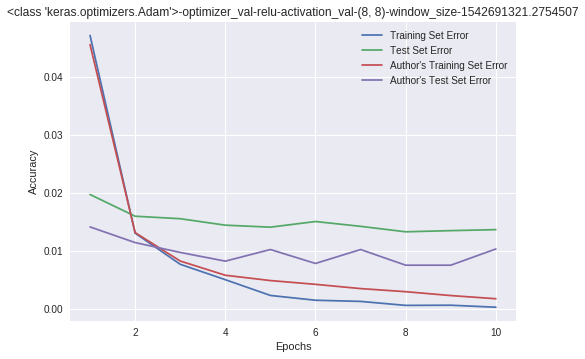

<class 'keras.optimizers.Adam'>-optimizer_val-relu-activation_val-(9, 9)-window_size-1542691363.1972153
Test loss: 0.05746912178221566
Test accuracy: 0.9875142857142857


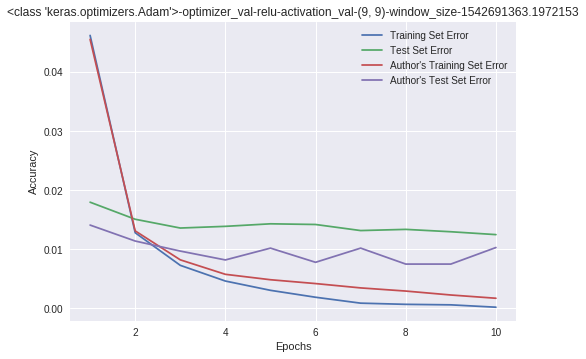

<class 'keras.optimizers.SGD'>-optimizer_val-relu-activation_val-(3, 3)-window_size-1542691407.9602442
Test loss: 0.2928407012164593
Test accuracy: 0.917600000013624


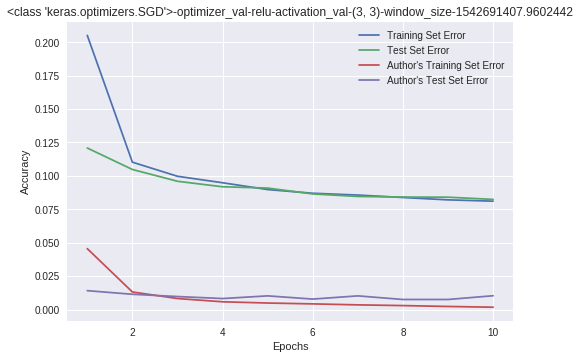

<class 'keras.optimizers.SGD'>-optimizer_val-relu-activation_val-(4, 4)-window_size-1542691454.9416192
Test loss: 0.2827588906679835
Test accuracy: 0.9195714285850525


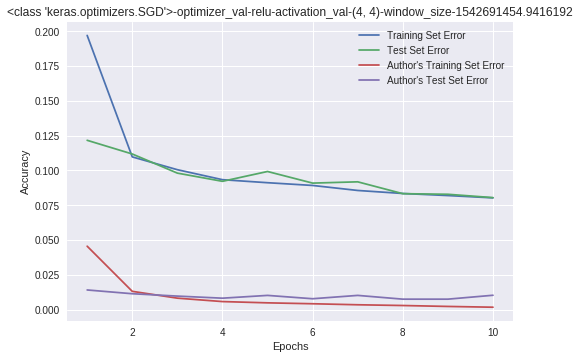

<class 'keras.optimizers.SGD'>-optimizer_val-relu-activation_val-(5, 5)-window_size-1542691499.9337451
Test loss: 0.26439145996911184
Test accuracy: 0.9265428571564811


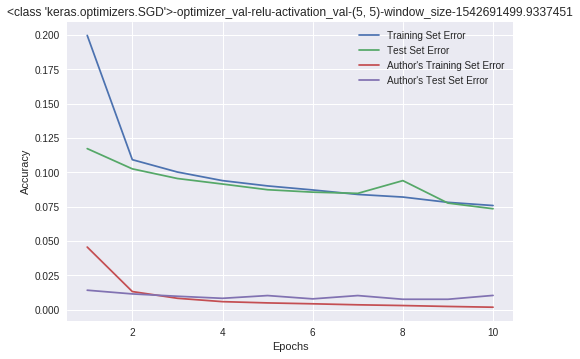

<class 'keras.optimizers.SGD'>-optimizer_val-relu-activation_val-(6, 6)-window_size-1542691543.08542
Test loss: 0.2461631096124649
Test accuracy: 0.9310571428435189


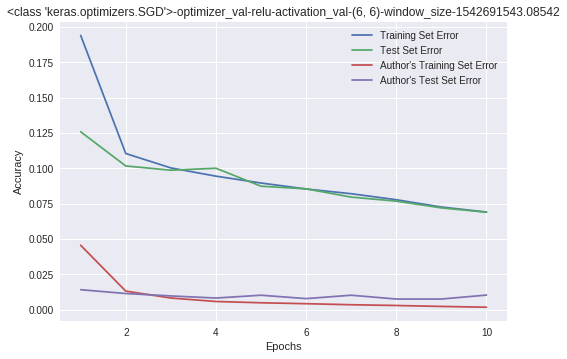

<class 'keras.optimizers.SGD'>-optimizer_val-relu-activation_val-(7, 7)-window_size-1542691584.6564374
Test loss: 0.21307435870383468
Test accuracy: 0.9388285714421953


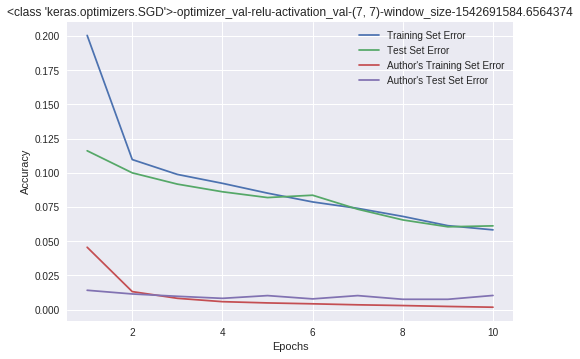

<class 'keras.optimizers.SGD'>-optimizer_val-relu-activation_val-(8, 8)-window_size-1542691628.9263585
Test loss: 0.18453865816380297
Test accuracy: 0.9477428571564811


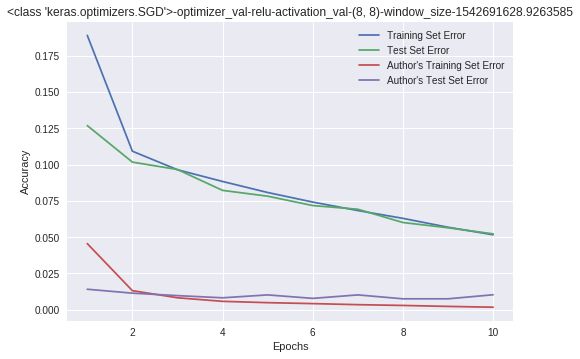

<class 'keras.optimizers.SGD'>-optimizer_val-relu-activation_val-(9, 9)-window_size-1542691670.586635
Test loss: 0.1908137871227094
Test accuracy: 0.945399999986376


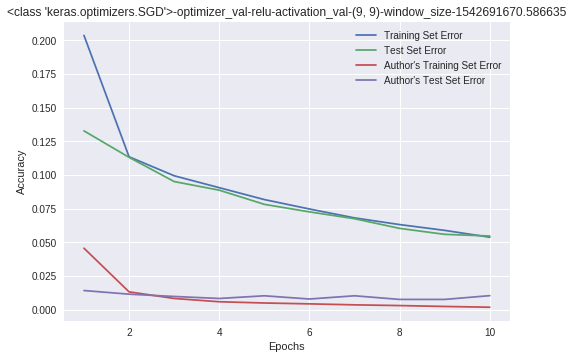

<class 'keras.optimizers.Adam'>-optimizer_val-sigmoid-activation_val-(3, 3)-window_size-1542691716.1657577
Test loss: 14.473588956124441
Test accuracy: 0.10202857142857143


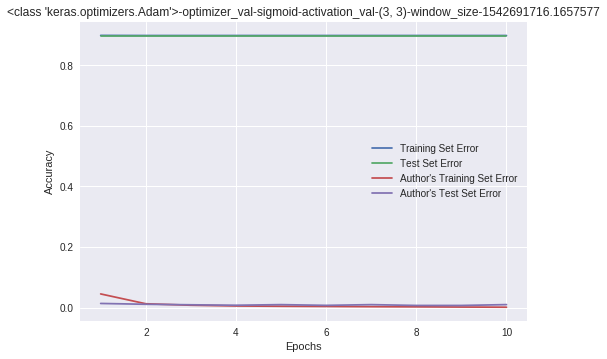

<class 'keras.optimizers.Adam'>-optimizer_val-sigmoid-activation_val-(4, 4)-window_size-1542691759.635883
Test loss: 14.528851000104632
Test accuracy: 0.0986


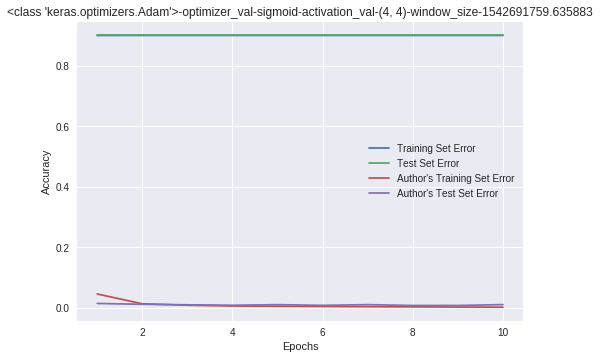

<class 'keras.optimizers.Adam'>-optimizer_val-sigmoid-activation_val-(5, 5)-window_size-1542691803.2934437
Test loss: 14.528851000104632
Test accuracy: 0.0986


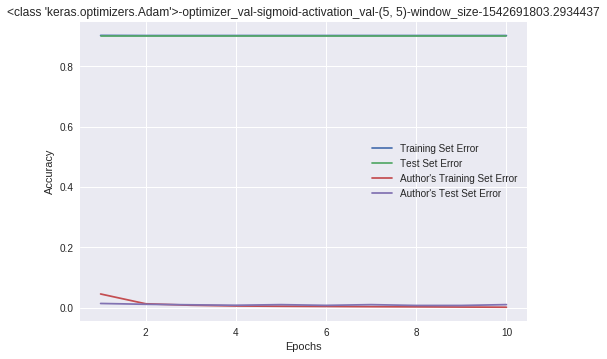

<class 'keras.optimizers.Adam'>-optimizer_val-sigmoid-activation_val-(6, 6)-window_size-1542691846.019457
Test loss: 14.305039796665737
Test accuracy: 0.11248571428571429


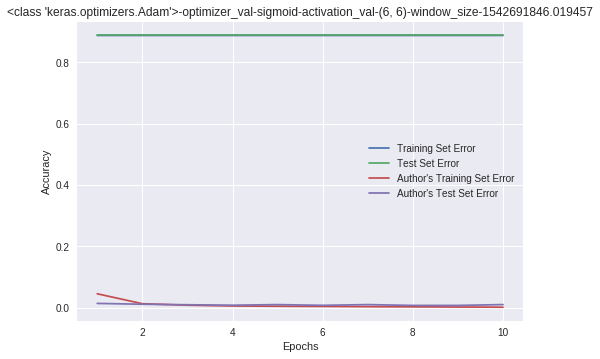

<class 'keras.optimizers.Adam'>-optimizer_val-sigmoid-activation_val-(7, 7)-window_size-1542691890.877103
Test loss: 14.439050201416016
Test accuracy: 0.10417142857142857


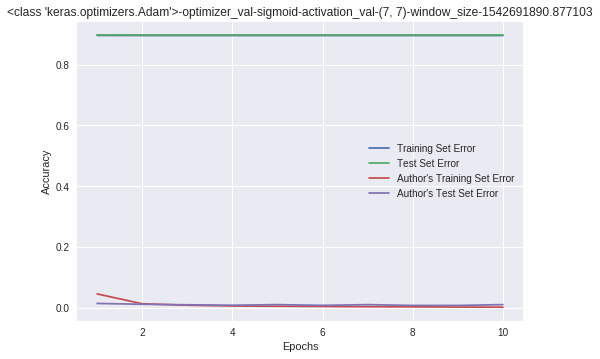

<class 'keras.optimizers.Adam'>-optimizer_val-sigmoid-activation_val-(8, 8)-window_size-1542691935.9314911
Test loss: 14.305039796665737
Test accuracy: 0.11248571428571429


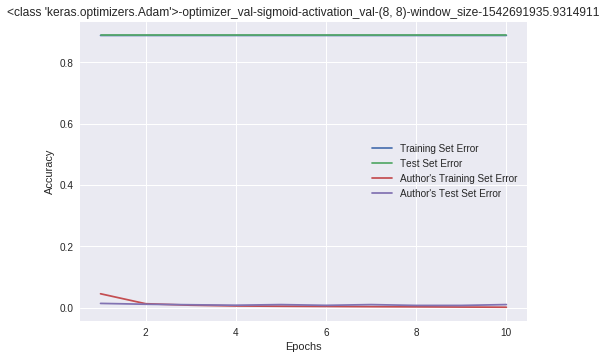

<class 'keras.optimizers.Adam'>-optimizer_val-sigmoid-activation_val-(9, 9)-window_size-1542691981.753419
Test loss: 14.528851000104632
Test accuracy: 0.0986


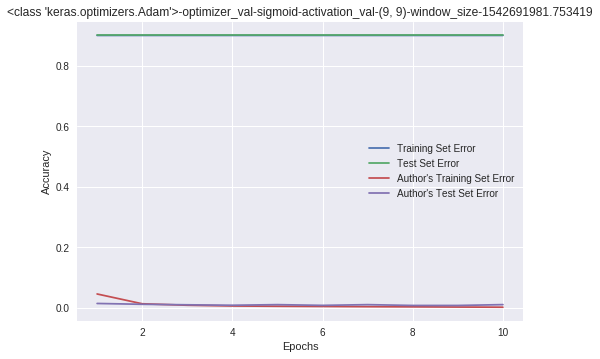

<class 'keras.optimizers.SGD'>-optimizer_val-sigmoid-activation_val-(3, 3)-window_size-1542692031.0124047
Test loss: 14.50858823765346
Test accuracy: 0.09985714285714285


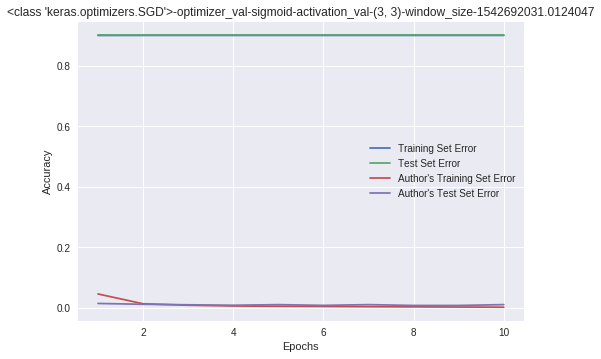

<class 'keras.optimizers.SGD'>-optimizer_val-sigmoid-activation_val-(4, 4)-window_size-1542692081.7559986
Test loss: 14.473588956124441
Test accuracy: 0.10202857142857143


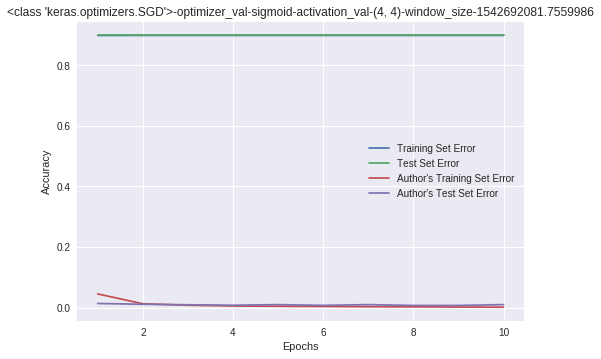

<class 'keras.optimizers.SGD'>-optimizer_val-sigmoid-activation_val-(5, 5)-window_size-1542692128.9283266
Test loss: 14.664242963518415
Test accuracy: 0.09019999999318803


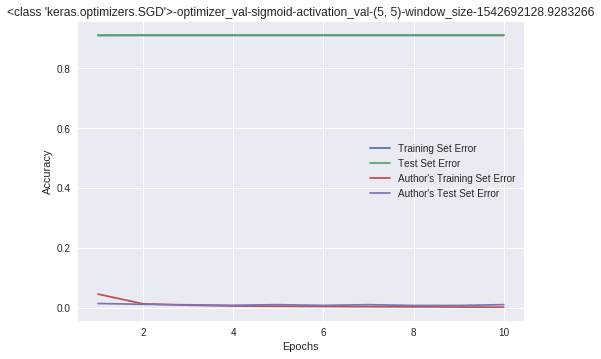

<class 'keras.optimizers.SGD'>-optimizer_val-sigmoid-activation_val-(6, 6)-window_size-1542692176.5533814
Test loss: 14.534377193777901
Test accuracy: 0.09825714285714286


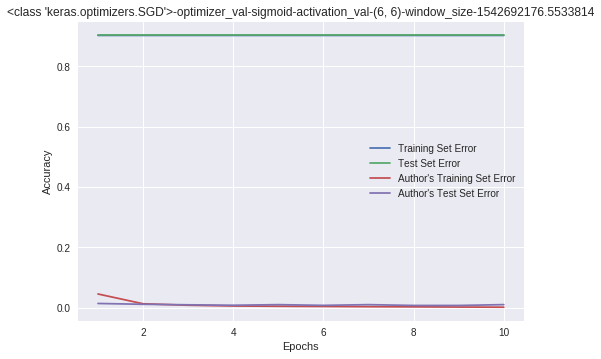

<class 'keras.optimizers.SGD'>-optimizer_val-sigmoid-activation_val-(7, 7)-window_size-1542692224.1473227
Test loss: 14.547271671840123
Test accuracy: 0.09745714285714285


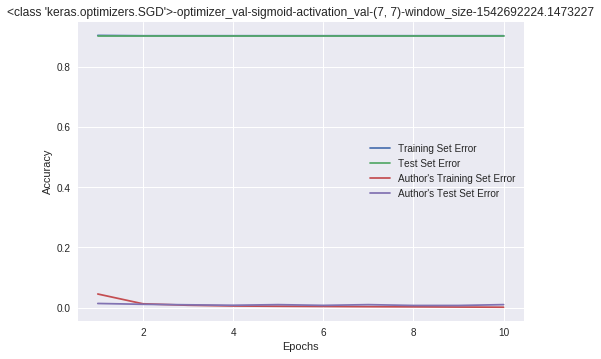

<class 'keras.optimizers.SGD'>-optimizer_val-sigmoid-activation_val-(8, 8)-window_size-1542692269.9278116
Test loss: 14.51549599522182
Test accuracy: 0.09942857142857142


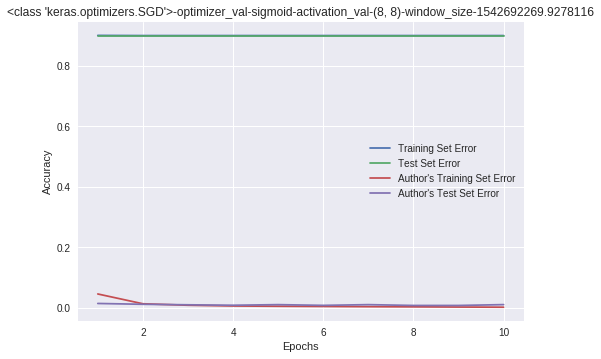

<class 'keras.optimizers.SGD'>-optimizer_val-sigmoid-activation_val-(9, 9)-window_size-1542692316.953242
Test loss: 8.361417423139299
Test accuracy: 0.45179999999659404


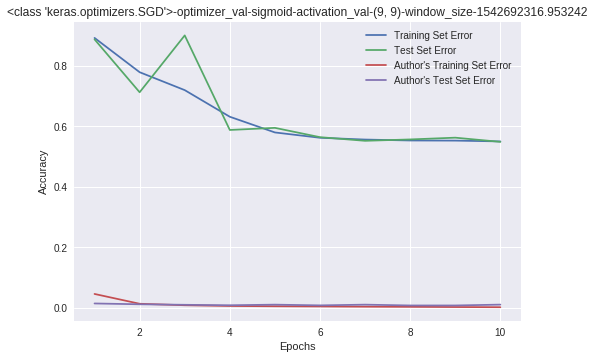

In [16]:

for activation_val in activation_vals:
  for optimizer_val in optimizer_vals:
    for window_size in window_sizes:
      NAME = "{}-optimizer_val-{}-activation_val-{}-window_size-{}".format(type(optimizer_val), activation_val, window_size, time())
      print(NAME)
      
      tensorboard = TensorBoard(log_dir="/tmp/log/{}".format(NAME))
      class AccuracyHistory(keras.callbacks.Callback):
        def on_train_begin(self, logs={}):
            self.acc = []
            self.val_acc =[]
            self.train_err=[]
            self.test_err=[]
        def on_epoch_end(self, batch, logs={}):
            self.train_err.append(1-logs.get('acc'))
            self.test_err.append(1-logs.get('val_acc'))
            self.acc.append(logs.get('acc'))
            self.val_acc.append(logs.get('val_acc'))
            
      history = AccuracyHistory()
      model = Sequential();
      model.add(Conv2D(64, kernel_size=window_size, strides=(1, 1),
                 activation=activation_val,
                 input_shape=input_shape))
  
      model.add(Flatten())
      #model.add(Dense(1000, activation=activation_val))
      model.add(Dense(num_classes, activation='softmax'))

      model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=optimizer_val,
                metrics=['accuracy'])

      model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=0,
                validation_data=(x_test, y_test),
                callbacks=[tensorboard,history],
                
                ) #
      
      score = model.evaluate(x_test, y_test, verbose=0)
      print('Test loss:', score[0])
      print('Test accuracy:', score[1])
      plt.title(NAME);
      plt.plot(range(1, len(history.train_err)+1),history.train_err,label="Training Set Error")
      plt.plot( range(1, len(history.test_err)+1),history.test_err,label="Test Set Error")
      plt.plot(range(1, len(auth_history.train_err)+1),auth_history.train_err,label="Author's Training Set Error")
      plt.plot( range(1, len(auth_history.test_err)+1),auth_history.test_err,label="Author's Test Set Error")
      
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.legend()
      plt.show()
      